<a href="https://colab.research.google.com/github/HirushaNAmarasinghe/Data-pre-processing-for-Reseach/blob/main/Supervised_DDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data set

In [13]:
import pandas as pd

df = pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

print(df.shape)
print(df.columns)

(170366, 79)
Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length

Remove rows with missing or infinite values

In [14]:
# Replace infinity with NaN and drop them
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)


Remove columns with constant values

In [15]:
df = df.loc[:, df.nunique() > 1]

**Encode Labels**

Check attack types

In [17]:
print(df.columns)
print(df[' Label'].value_counts())

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count',

Create binary or multiclass labels

In [19]:
df[' Label'] = df[' Label'].apply(lambda x: 'Attack' if x != 'BENIGN' else 'BENIGN')

Encode categorical labels

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df[' Label'] = label_encoder.fit_transform(df[' Label'])

# **Feature Selection**

Remove non-numeric and identifier columns

In [23]:
non_features = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'Label Name']  # remove as needed
X = df.drop(columns=non_features, errors='ignore')
y = df[' Label']

Normalize features

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


Train Classifier(Random Forest)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00       436
      BENIGN       1.00      1.00      1.00     33611

    accuracy                           1.00     34047
   macro avg       1.00      1.00      1.00     34047
weighted avg       1.00      1.00      1.00     34047



Evaluate Model(Random Forest)

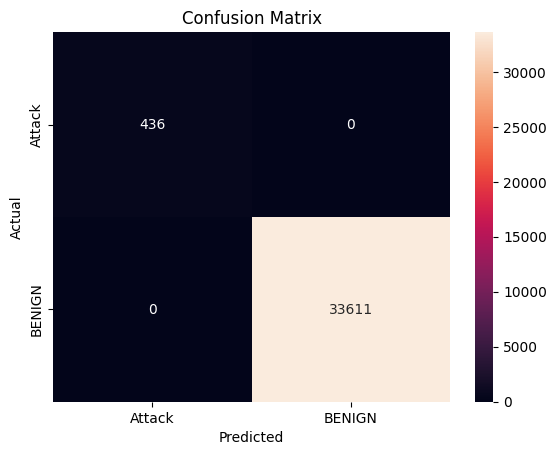

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
